In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
##printing the text
text = data = "October arrived, spreading a damp chill over the grounds and into the castle.\n Madam Pomfrey, the nurse, was kept busy by a sudden spate of colds among the staff and students.\n Her Pepperup potion worked instantly, though it left the drinker smoking at the ears for several hours afterward. Ginny Weasley, who had been looking pale, was bullied into taking some by Percy.\n The steam pouring from under her vivid hair gave the impression that her whole head was on fire.\n Raindrops the size of bullets thundered on the castle windows for days on end; the lake rose, the flower beds turned into muddy streams, and Hagrid's pumpkins swelled to the size of garden sheds.\n Oliver Wood's enthusiasm for regular training sessions, however, was not dampened, which was why Harry was to be found, late one stormy Saturday afternoon a few days before Halloween, returning to Gryffindor Tower, drenched to the skin and splattered with mud."
print(len(text))

928


In [ ]:
corpus = text.lower().split('\n')

# tokenizing
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
vocab_size = len(tokenizer.word_index) + 1 # extra 1 for the OOV token.

print(tokenizer.word_index)
print(vocab_size)

{'the': 1, 'was': 2, 'and': 3, 'to': 4, 'a': 5, 'into': 6, 'of': 7, 'her': 8, 'for': 9, 'on': 10, 'castle': 11, 'by': 12, 'size': 13, 'days': 14, 'october': 15, 'arrived': 16, 'spreading': 17, 'damp': 18, 'chill': 19, 'over': 20, 'grounds': 21, 'madam': 22, 'pomfrey': 23, 'nurse': 24, 'kept': 25, 'busy': 26, 'sudden': 27, 'spate': 28, 'colds': 29, 'among': 30, 'staff': 31, 'students': 32, 'pepperup': 33, 'potion': 34, 'worked': 35, 'instantly': 36, 'though': 37, 'it': 38, 'left': 39, 'drinker': 40, 'smoking': 41, 'at': 42, 'ears': 43, 'several': 44, 'hours': 45, 'afterward': 46, 'ginny': 47, 'weasley': 48, 'who': 49, 'had': 50, 'been': 51, 'looking': 52, 'pale': 53, 'bullied': 54, 'taking': 55, 'some': 56, 'percy': 57, 'steam': 58, 'pouring': 59, 'from': 60, 'under': 61, 'vivid': 62, 'hair': 63, 'gave': 64, 'impression': 65, 'that': 66, 'whole': 67, 'head': 68, 'fire': 69, 'raindrops': 70, 'bullets': 71, 'thundered': 72, 'windows': 73, 'end': 74, 'lake': 75, 'rose': 76, 'flower': 77, '

In [ ]:
input_sequences = []
for i in corpus:
    tokens = tokenizer.texts_to_sequences([i])[0]
    for i in range(1, len(tokens)):
        n_gram_sequences = tokens[:i+1]
        input_sequences.append(n_gram_sequences)


In [ ]:
#now we pad the sequences.
max_len = max([len(i) for i in input_sequences])
input_sequence_array = np.array(pad_sequences(input_sequences, maxlen = max_len, padding="pre"))

In [ ]:
X = input_sequence_array[:,:-1]
y = input_sequence_array[:, -1]

In [ ]:
# one hot encoding the y variable
y = tf.keras.utils.to_categorical(y, num_classes = vocab_size)


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 32, input_length=max_len-1)) # -1 because the last element is for the output
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = False)))
model.add(tf.keras.layers.Dense(vocab_size, activation="softmax"))

model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_19 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_25                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
history = model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3552 - loss: 2.2039
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3409 - loss: 2.2561 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4454 - loss: 2.1286 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3825 - loss: 2.1314 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4309 - loss: 2.0988 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4440 - loss: 2.0622 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4322 - loss: 2.0821 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4476 - loss: 2.0682 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5205 - loss: 2.0155 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5182 - loss: 1.9654 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5260 - loss: 1.9312 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4999 - los

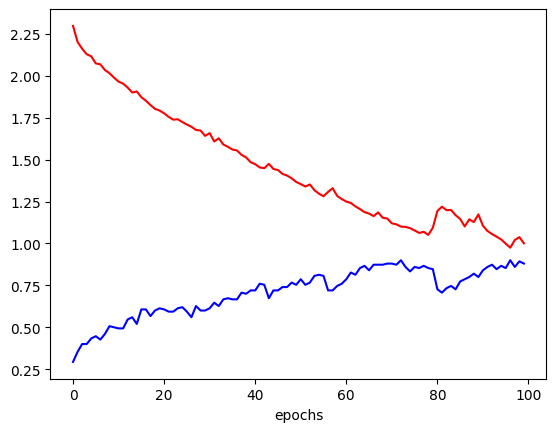

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color="blue")
plt.plot(history.history['loss'], color="red")
plt.xlabel("epochs")
plt.show()

In [ ]:
import numpy as np

next = ""
seed = "october was here"

for _ in range(100):
    tokens = tokenizer.texts_to_sequences([seed])[0]
    tokens = pad_sequences([tokens], maxlen = max_len - 1, padding="pre")
    predicted = np.argmax(model.predict(tokens), axis=-1)

    def get_keys_from_value(d, val):
        return [k for k, v in d.items() if v == val]

    next = get_keys_from_value(tokenizer.word_index, predicted[0])[0]
    seed += f' {next}'

print(seed)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━